# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [1]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

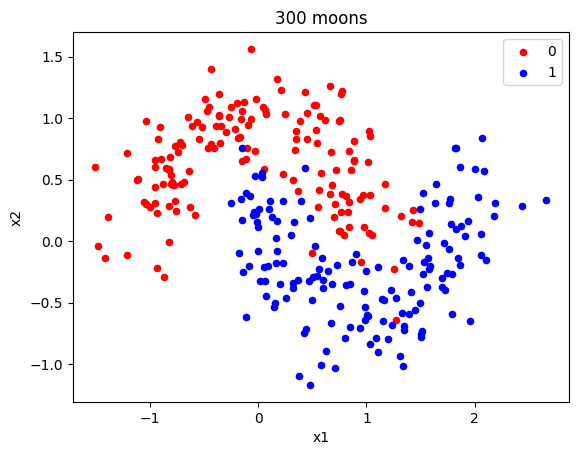

In [2]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

In [34]:
X1, y1 = make_moons(n_samples=5000, noise=0.1, random_state=0)

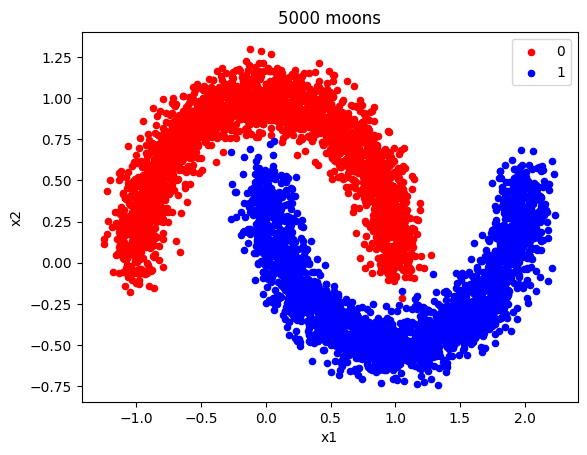

In [35]:
plot_moons(X1, y1)

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [36]:
X2, y2 = make_moons(n_samples=250, noise=0.2, random_state=0)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [39]:
from tensorflow.keras import models
from tensorflow.keras import layers

2023-05-29 10:48:39.848084: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-29 10:48:40.037475: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-29 10:48:40.046516: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-29 10:48:40.046527: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [89]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    
    model = models.Sequential()
    
    model.add(layers.Dense(5, activation='relu', input_dim=2))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [92]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 15        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [93]:
11

11

## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set using `100 epochs`! 

Store the results of the training into a `history` variable. ❓

In [94]:
X_train.shape

(175, 2)

In [95]:
model.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5486
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6955 - accuracy: 0.5200
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5486
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.6000
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 0.6453 - accuracy: 0.6171
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6857
Epoch 7/100
18/18 [==============================] - 0s 996us/step - loss: 0.6143 - accuracy: 0.7371
Epoch 8/100
18/18 [==============================] - 0s 963us/step - loss: 0.5992 - accuracy: 0.7829
Epoch 9/100
18/18 [==============================] - 0s 812us/step - loss: 0.5827 - accuracy: 0.8000
Epoch 10/100
18/18 [==============================] - 0s 978us/step - loss: 0.5669 - accuracy: 0.8171
E

18/18 [==============================] - 0s 925us/step - loss: 0.2812 - accuracy: 0.8743
Epoch 83/100
18/18 [==============================] - 0s 978us/step - loss: 0.2805 - accuracy: 0.8743
Epoch 84/100
18/18 [==============================] - 0s 926us/step - loss: 0.2799 - accuracy: 0.8743
Epoch 85/100
18/18 [==============================] - 0s 869us/step - loss: 0.2794 - accuracy: 0.8743
Epoch 86/100
18/18 [==============================] - 0s 842us/step - loss: 0.2789 - accuracy: 0.8743
Epoch 87/100
18/18 [==============================] - 0s 850us/step - loss: 0.2785 - accuracy: 0.8743
Epoch 88/100
18/18 [==============================] - 0s 908us/step - loss: 0.2778 - accuracy: 0.8743
Epoch 89/100
18/18 [==============================] - 0s 1ms/step - loss: 0.2774 - accuracy: 0.8743
Epoch 90/100
18/18 [==============================] - 0s 904us/step - loss: 0.2770 - accuracy: 0.8743
Epoch 91/100
18/18 [==============================] - 0s 971us/step - loss: 0.2766 - accuracy: 0.

In [96]:
history = model.history

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [97]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7f4ebfc36440>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.7130533456802368,
   0.6955059170722961,
   0.6779485940933228,
   0.6611471772193909,
   0.6452714800834656,
   0.629890501499176,
   0.6142981648445129,
   0.5991600155830383,
   0.5826514959335327,
   0.5668975114822388,
   0.5504840016365051,
   0.5344844460487366,
   0.5186126232147217,
   0.503462016582489,
   0.48989471793174744,
   0.47629544138908386,
   0.4643297791481018,
   0.45306140184402466,
   0.44296520948410034,
   0.43331849575042725,
   0.4240702688694,
   0.4156706929206848,
   0.4078860878944397,
   0.40054312348365784,
   0.3940073549747467,
   0.38739636540412903,
   0.3815723657608032,
   0.37638118863105774,
   0.3708013892173767,
   0.3659170866012573,
   0.36143991351127625,
   0.35708460211753845,
   0.35359254479408264,
   0.34996816515922546,
   0.3459817171096802,
   0.34278807044029

❓ Plot the history of the train loss using the following function ❓

In [98]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

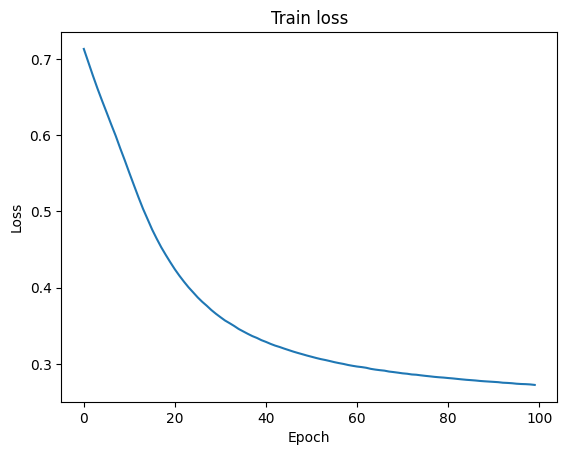

In [99]:
plot_history(history)

❓ What do you observe ❓

> Smooth downwards non linear curve, the loss decreases (at a decreasing rate) as Epochs increase

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [100]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


In [101]:
y_pred

array([[0.9325903 ],
       [0.87751234],
       [0.17224398],
       [0.029242  ],
       [0.9523262 ],
       [0.8518939 ],
       [0.85128367],
       [0.3215761 ],
       [0.9852071 ],
       [0.48885584],
       [0.97159386],
       [0.9236681 ],
       [0.9767492 ],
       [0.54215777],
       [0.5118804 ],
       [0.24779579],
       [0.9779123 ],
       [0.5209213 ],
       [0.48494166],
       [0.24696834],
       [0.03213239],
       [0.02172744],
       [0.06742599],
       [0.96784705],
       [0.02110283],
       [0.73644626],
       [0.04845914],
       [0.049719  ],
       [0.6454016 ],
       [0.864119  ],
       [0.64322114],
       [0.6333403 ],
       [0.56245923],
       [0.02795581],
       [0.9801484 ],
       [0.07268801],
       [0.9254045 ],
       [0.9181341 ],
       [0.8702403 ],
       [0.7435566 ],
       [0.9491132 ],
       [0.03421491],
       [0.02957618],
       [0.06559875],
       [0.67014605],
       [0.3207399 ],
       [0.06466201],
       [0.030

❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [102]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8400


[0.2816306948661804, 0.8399999737739563]

In [103]:
accuracy = 0.8267

**🧪 Test your code**

In [104]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/jake/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/jake/code/jake-humphreys/data-your-first-neural-network/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

In [105]:
from utils.plots import plot_decision_regions

In [106]:
!tree

.
├── Makefile
├── moons_example.png
├── README.md
├── tests
│   ├── deeper_model.pickle
│   ├── first_model.pickle
│   ├── __init__.py
│   ├── __pycache__
│   │   ├── __init__.cpython-310.pyc
│   │   ├── test_deeper_model.cpython-310-pytest-7.1.3.pyc
│   │   └── test_first_model.cpython-310-pytest-7.1.3.pyc
│   ├── test_deeper_model.py
│   └── test_first_model.py
├── utils
│   ├── __init__.py
│   ├── plots.py
│   └── __pycache__
│       ├── __init__.cpython-310.pyc
│       └── plots.cpython-310.pyc
└── your_first_neural_network.ipynb

4 directories, 16 files


2289/2289 [==============================] - 1s 586us/step


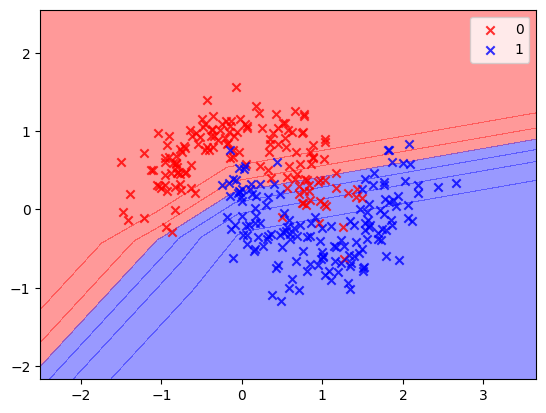

In [107]:
plot_decision_regions(X, y, model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [108]:
model_500 = initialize_model()

In [109]:
model_500.fit(X_train, y_train, batch_size=10, epochs=500)

Epoch 1/500
18/18 [==============================] - 0s 2ms/step - loss: 0.7319 - accuracy: 0.4057
Epoch 2/500
18/18 [==============================] - 0s 1ms/step - loss: 0.7172 - accuracy: 0.3886
Epoch 3/500
18/18 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.4057
Epoch 4/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5257
Epoch 5/500
18/18 [==============================] - 0s 888us/step - loss: 0.6814 - accuracy: 0.6057
Epoch 6/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6971
Epoch 7/500
18/18 [==============================] - 0s 992us/step - loss: 0.6612 - accuracy: 0.7657
Epoch 8/500
18/18 [==============================] - 0s 816us/step - loss: 0.6505 - accuracy: 0.8286
Epoch 9/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6411 - accuracy: 0.8343
Epoch 10/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.8171
Epo

18/18 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8514
Epoch 83/500
18/18 [==============================] - 0s 939us/step - loss: 0.3057 - accuracy: 0.8514
Epoch 84/500
18/18 [==============================] - 0s 934us/step - loss: 0.3044 - accuracy: 0.8514
Epoch 85/500
18/18 [==============================] - 0s 923us/step - loss: 0.3033 - accuracy: 0.8514
Epoch 86/500
18/18 [==============================] - 0s 949us/step - loss: 0.3023 - accuracy: 0.8571
Epoch 87/500
18/18 [==============================] - 0s 909us/step - loss: 0.3012 - accuracy: 0.8571
Epoch 88/500
18/18 [==============================] - 0s 910us/step - loss: 0.3003 - accuracy: 0.8571
Epoch 89/500
18/18 [==============================] - 0s 912us/step - loss: 0.2993 - accuracy: 0.8571
Epoch 90/500
18/18 [==============================] - 0s 928us/step - loss: 0.2982 - accuracy: 0.8571
Epoch 91/500
18/18 [==============================] - 0s 920us/step - loss: 0.2972 - accuracy: 0.

Epoch 162/500
18/18 [==============================] - 0s 884us/step - loss: 0.2560 - accuracy: 0.8914
Epoch 163/500
18/18 [==============================] - 0s 885us/step - loss: 0.2558 - accuracy: 0.8914
Epoch 164/500
18/18 [==============================] - 0s 879us/step - loss: 0.2554 - accuracy: 0.8914
Epoch 165/500
18/18 [==============================] - 0s 850us/step - loss: 0.2554 - accuracy: 0.8971
Epoch 166/500
18/18 [==============================] - 0s 870us/step - loss: 0.2547 - accuracy: 0.8914
Epoch 167/500
18/18 [==============================] - 0s 895us/step - loss: 0.2546 - accuracy: 0.8914
Epoch 168/500
18/18 [==============================] - 0s 871us/step - loss: 0.2542 - accuracy: 0.8914
Epoch 169/500
18/18 [==============================] - 0s 891us/step - loss: 0.2539 - accuracy: 0.8914
Epoch 170/500
18/18 [==============================] - 0s 896us/step - loss: 0.2538 - accuracy: 0.8914
Epoch 171/500
18/18 [==============================] - 0s 895us/step - lo

18/18 [==============================] - 0s 883us/step - loss: 0.2371 - accuracy: 0.9086
Epoch 242/500
18/18 [==============================] - 0s 888us/step - loss: 0.2371 - accuracy: 0.9086
Epoch 243/500
18/18 [==============================] - 0s 892us/step - loss: 0.2368 - accuracy: 0.9086
Epoch 244/500
18/18 [==============================] - 0s 921us/step - loss: 0.2366 - accuracy: 0.9086
Epoch 245/500
18/18 [==============================] - 0s 926us/step - loss: 0.2363 - accuracy: 0.9143
Epoch 246/500
18/18 [==============================] - 0s 838us/step - loss: 0.2365 - accuracy: 0.9143
Epoch 247/500
18/18 [==============================] - 0s 907us/step - loss: 0.2362 - accuracy: 0.9143
Epoch 248/500
18/18 [==============================] - 0s 835us/step - loss: 0.2360 - accuracy: 0.9086
Epoch 249/500
18/18 [==============================] - 0s 785us/step - loss: 0.2357 - accuracy: 0.9143
Epoch 250/500
18/18 [==============================] - 0s 857us/step - loss: 0.2356 - a

18/18 [==============================] - 0s 926us/step - loss: 0.2280 - accuracy: 0.9143
Epoch 321/500
18/18 [==============================] - 0s 879us/step - loss: 0.2281 - accuracy: 0.9143
Epoch 322/500
18/18 [==============================] - 0s 849us/step - loss: 0.2277 - accuracy: 0.9143
Epoch 323/500
18/18 [==============================] - 0s 840us/step - loss: 0.2276 - accuracy: 0.9143
Epoch 324/500
18/18 [==============================] - 0s 876us/step - loss: 0.2278 - accuracy: 0.9143
Epoch 325/500
18/18 [==============================] - 0s 898us/step - loss: 0.2274 - accuracy: 0.9143
Epoch 326/500
18/18 [==============================] - 0s 936us/step - loss: 0.2274 - accuracy: 0.9143
Epoch 327/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2274 - accuracy: 0.9143
Epoch 328/500
18/18 [==============================] - 0s 977us/step - loss: 0.2274 - accuracy: 0.9143
Epoch 329/500
18/18 [==============================] - 0s 859us/step - loss: 0.2272 - acc

18/18 [==============================] - 0s 824us/step - loss: 0.2217 - accuracy: 0.9143
Epoch 400/500
18/18 [==============================] - 0s 836us/step - loss: 0.2216 - accuracy: 0.9143
Epoch 401/500
18/18 [==============================] - 0s 840us/step - loss: 0.2215 - accuracy: 0.9143
Epoch 402/500
18/18 [==============================] - 0s 853us/step - loss: 0.2214 - accuracy: 0.9143
Epoch 403/500
18/18 [==============================] - 0s 836us/step - loss: 0.2217 - accuracy: 0.9143
Epoch 404/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.9143
Epoch 405/500
18/18 [==============================] - 0s 965us/step - loss: 0.2213 - accuracy: 0.9143
Epoch 406/500
18/18 [==============================] - 0s 974us/step - loss: 0.2210 - accuracy: 0.9143
Epoch 407/500
18/18 [==============================] - 0s 935us/step - loss: 0.2212 - accuracy: 0.9143
Epoch 408/500
18/18 [==============================] - 0s 930us/step - loss: 0.2209 - acc

18/18 [==============================] - 0s 918us/step - loss: 0.2147 - accuracy: 0.9200
Epoch 479/500
18/18 [==============================] - 0s 941us/step - loss: 0.2146 - accuracy: 0.9200
Epoch 480/500
18/18 [==============================] - 0s 967us/step - loss: 0.2146 - accuracy: 0.9200
Epoch 481/500
18/18 [==============================] - 0s 965us/step - loss: 0.2144 - accuracy: 0.9200
Epoch 482/500
18/18 [==============================] - 0s 923us/step - loss: 0.2146 - accuracy: 0.9200
Epoch 483/500
18/18 [==============================] - 0s 923us/step - loss: 0.2141 - accuracy: 0.9200
Epoch 484/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9200
Epoch 485/500
18/18 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9200
Epoch 486/500
18/18 [==============================] - 0s 879us/step - loss: 0.2139 - accuracy: 0.9200
Epoch 487/500
18/18 [==============================] - 0s 958us/step - loss: 0.2139 - accur

In [110]:
history_500 = model_500.history

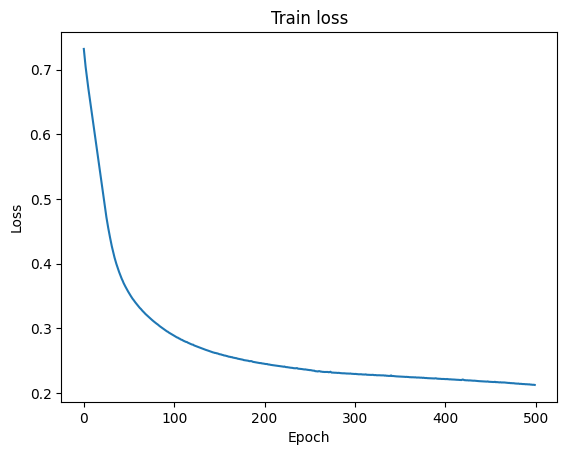

In [111]:
plot_history(history_500)

❓ Did the test accuracy improve? ❓

In [117]:
Not really

SyntaxError: invalid syntax (3196623578.py, line 1)

<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [118]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   
    
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu', input_dim=2))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [119]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 20)                60        
                                                                 
 dense_23 (Dense)            (None, 10)                210       
                                                                 
 dense_24 (Dense)            (None, 5)                 55        
                                                                 
 dense_25 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs=500)

Epoch 1/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.7029
Epoch 2/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.7371
Epoch 3/500
18/18 [==============================] - 0s 1ms/step - loss: 0.6404 - accuracy: 0.7314
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.7829
Epoch 5/500
18/18 [==============================] - 0s 1ms/step - loss: 0.5867 - accuracy: 0.8000
Epoch 6/500
18/18 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.8057
Epoch 7/500
18/18 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.8343
Epoch 8/500
18/18 [==============================] - 0s 1ms/step - loss: 0.5302 - accuracy: 0.8400
Epoch 9/500
18/18 [==============================] - 0s 1ms/step - loss: 0.5151 - accuracy: 0.8571
Epoch 10/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.8571
Epoch 11/

18/18 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9714
Epoch 83/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9657
Epoch 84/500
18/18 [==============================] - 0s 922us/step - loss: 0.0758 - accuracy: 0.9771
Epoch 85/500
18/18 [==============================] - 0s 938us/step - loss: 0.0769 - accuracy: 0.9657
Epoch 86/500
18/18 [==============================] - 0s 996us/step - loss: 0.0743 - accuracy: 0.9657
Epoch 87/500
18/18 [==============================] - 0s 958us/step - loss: 0.0751 - accuracy: 0.9600
Epoch 88/500
18/18 [==============================] - 0s 930us/step - loss: 0.0832 - accuracy: 0.9657
Epoch 89/500
18/18 [==============================] - 0s 1ms/step - loss: 0.0793 - accuracy: 0.9543
Epoch 90/500
18/18 [==============================] - 0s 935us/step - loss: 0.0747 - accuracy: 0.9657
Epoch 91/500
18/18 [==============================] - 0s 981us/step - loss: 0.0711 - accuracy: 0.9714

In [ ]:
history_l3 = model.history

In [ ]:
plot_history(history_l3)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [113]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8400


[0.2816306948661804, 0.8399999737739563]

In [114]:
accuracy_deep = 0.9200


🧪 **Test your code**

In [115]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/jake/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/jake/code/jake-humphreys/data-your-first-neural-network/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

2289/2289 [==============================] - 1s 578us/step


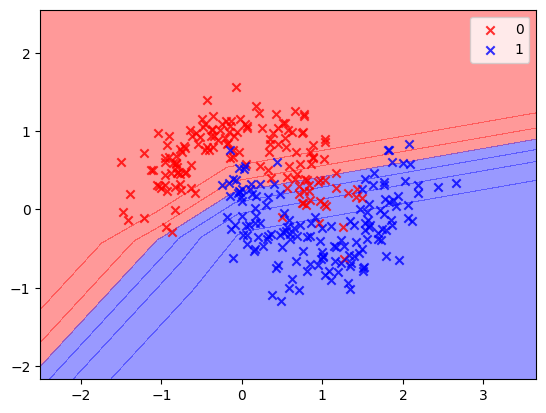

In [116]:
plot_decision_regions(X, y, model)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!